<a href="https://colab.research.google.com/github/AraksiaGevorgyan/Machine-Learning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/drive/My Drive/data/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11704,-117.97,33.89,14.0,923.0,136.0,420.0,130.0,10.2252,<1H OCEAN,462800.0
15318,-117.36,33.20,26.0,2447.0,482.0,1405.0,486.0,3.2917,NEAR OCEAN,150800.0
5925,-117.80,34.15,14.0,7876.0,1253.0,3699.0,1162.0,5.5423,INLAND,248700.0
3160,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND,106300.0
19783,-122.93,40.78,20.0,3758.0,798.0,1685.0,757.0,2.3667,INLAND,91200.0
...,...,...,...,...,...,...,...,...,...,...
13050,-121.32,38.59,24.0,4378.0,910.0,2149.0,812.0,2.5035,INLAND,123700.0
16484,-121.06,38.25,13.0,651.0,102.0,301.0,104.0,3.6528,INLAND,200000.0
9850,-121.89,36.60,19.0,656.0,200.0,248.0,173.0,1.2656,<1H OCEAN,500000.0
3490,-118.46,34.28,23.0,1663.0,302.0,1242.0,283.0,5.5931,<1H OCEAN,217600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

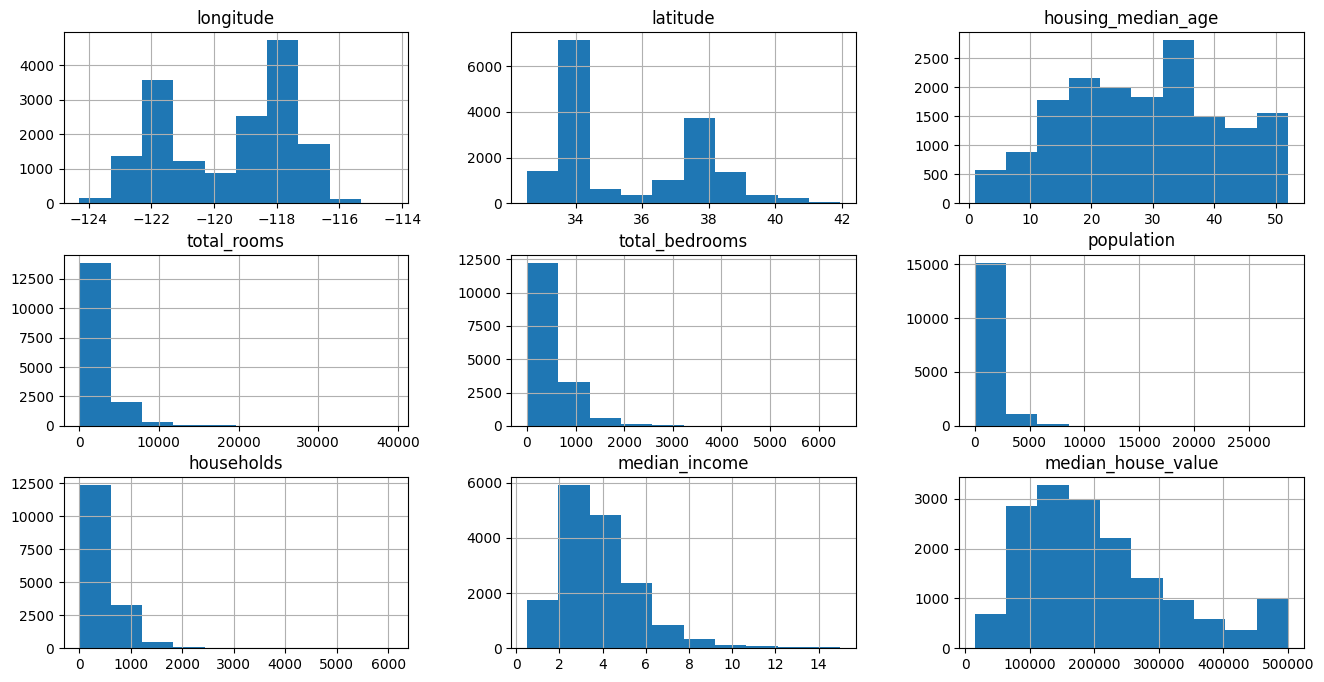

In [36]:
train_data.hist(figsize = (16,8))

In [37]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11704,-117.97,33.89,14.0,923.0,136.0,420.0,130.0,10.2252,<1H OCEAN,462800.0
15318,-117.36,33.20,26.0,2447.0,482.0,1405.0,486.0,3.2917,NEAR OCEAN,150800.0
5925,-117.80,34.15,14.0,7876.0,1253.0,3699.0,1162.0,5.5423,INLAND,248700.0
3160,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND,106300.0
19783,-122.93,40.78,20.0,3758.0,798.0,1685.0,757.0,2.3667,INLAND,91200.0
...,...,...,...,...,...,...,...,...,...,...
13050,-121.32,38.59,24.0,4378.0,910.0,2149.0,812.0,2.5035,INLAND,123700.0
16484,-121.06,38.25,13.0,651.0,102.0,301.0,104.0,3.6528,INLAND,200000.0
9850,-121.89,36.60,19.0,656.0,200.0,248.0,173.0,1.2656,<1H OCEAN,500000.0
3490,-118.46,34.28,23.0,1663.0,302.0,1242.0,283.0,5.5931,<1H OCEAN,217600.0


Text(0.5, 1.0, 'Correlation Matrix')

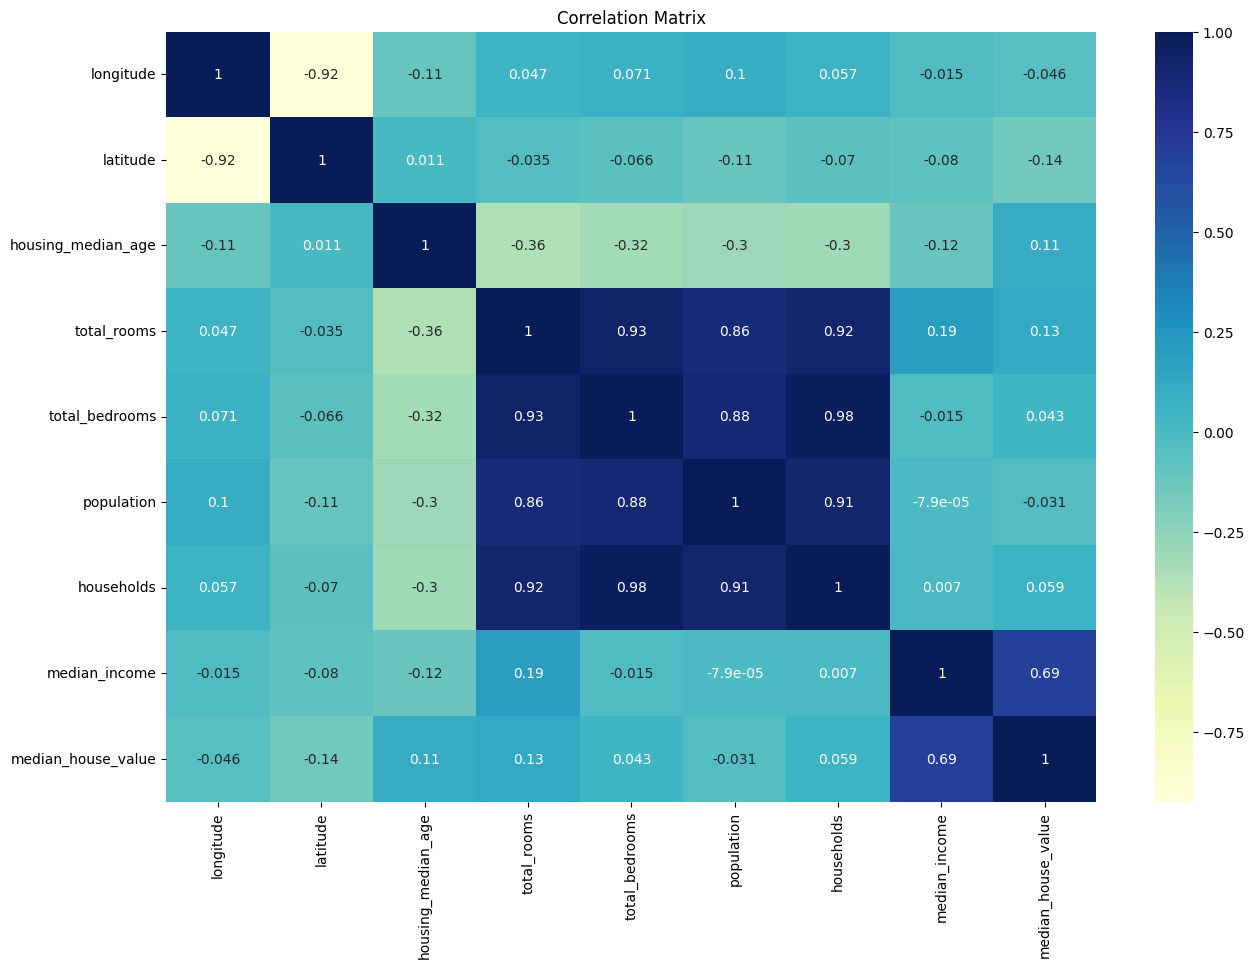

In [38]:
plt.figure(figsize=(15,10))
data_num = train_data.select_dtypes(include='number')
sns.heatmap(data_num.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')

In [39]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

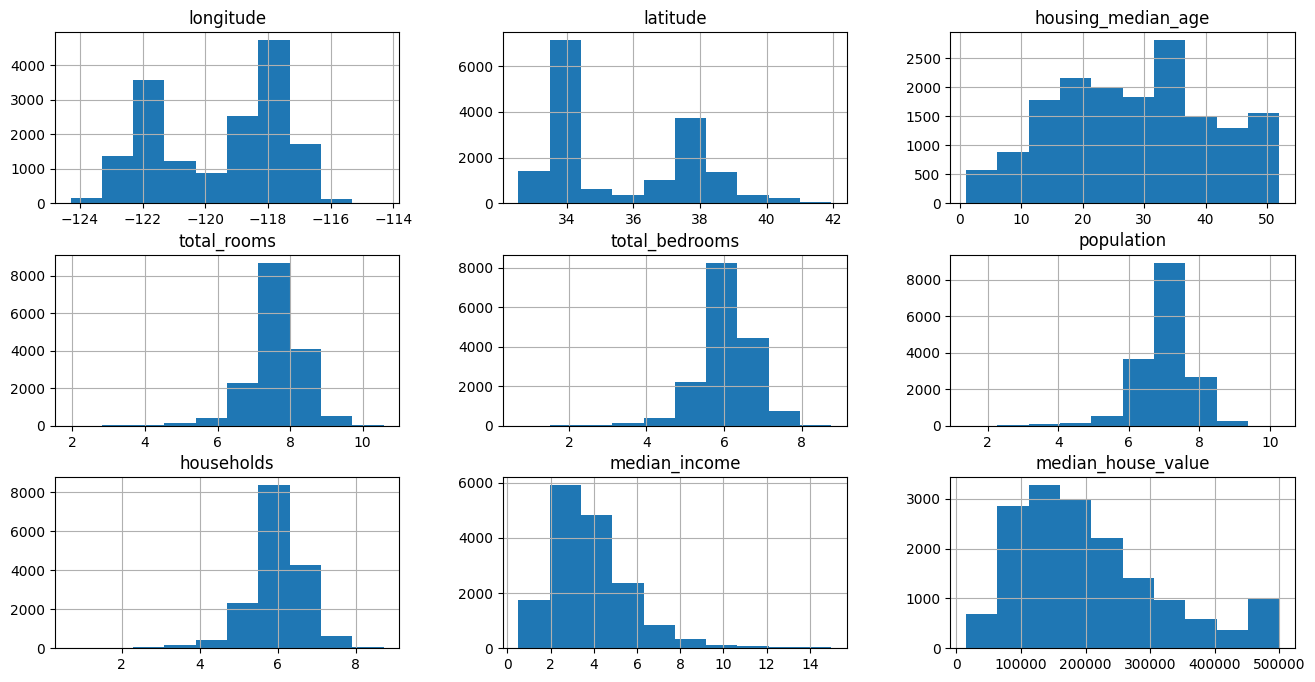

In [40]:
train_data.hist(figsize = (16,8))

In [41]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7258
INLAND,5181
NEAR OCEAN,2106
NEAR BAY,1796
ISLAND,5


In [42]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

In [43]:
train_data = train_data.drop(["ocean_proximity"], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11704,-117.97,33.89,14.0,6.828712,4.919981,6.042633,4.875197,10.2252,462800.0,1,0,0,0,0
15318,-117.36,33.20,26.0,7.803027,6.180017,7.248504,6.188264,3.2917,150800.0,0,0,0,0,1
5925,-117.80,34.15,14.0,8.971702,7.134094,8.216088,7.058758,5.5423,248700.0,0,1,0,0,0
3160,-118.92,35.13,29.0,7.168580,5.572154,6.813445,5.537334,1.9236,106300.0,0,1,0,0,0
19783,-122.93,40.78,20.0,8.231908,6.683361,7.430114,6.630683,2.3667,91200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13050,-121.32,38.59,24.0,8.384576,6.814543,7.673223,6.700731,2.5035,123700.0,0,1,0,0,0
16484,-121.06,38.25,13.0,6.480045,4.634729,5.710427,4.653960,3.6528,200000.0,0,1,0,0,0
9850,-121.89,36.60,19.0,6.487684,5.303305,5.517453,5.159055,1.2656,500000.0,1,0,0,0,0
3490,-118.46,34.28,23.0,7.416980,5.713733,7.125283,5.648974,5.5931,217600.0,1,0,0,0,0


<Axes: >

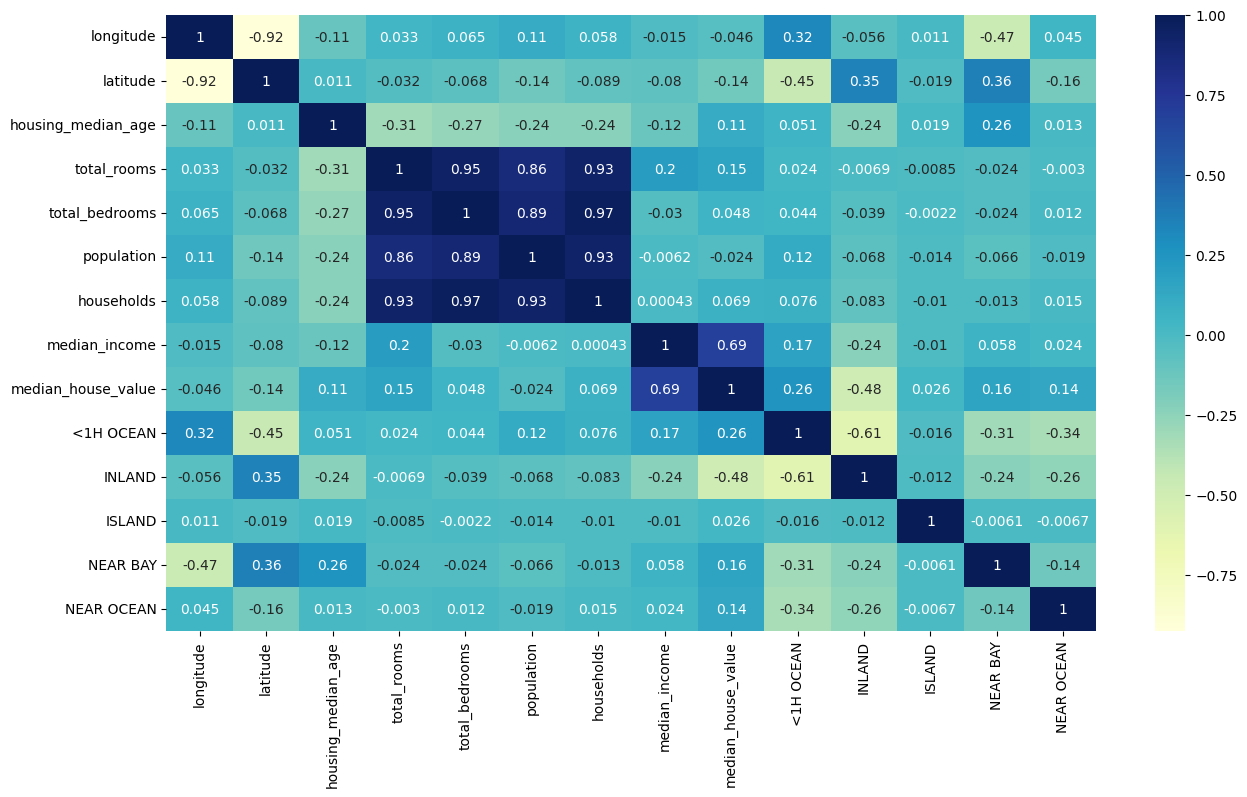

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

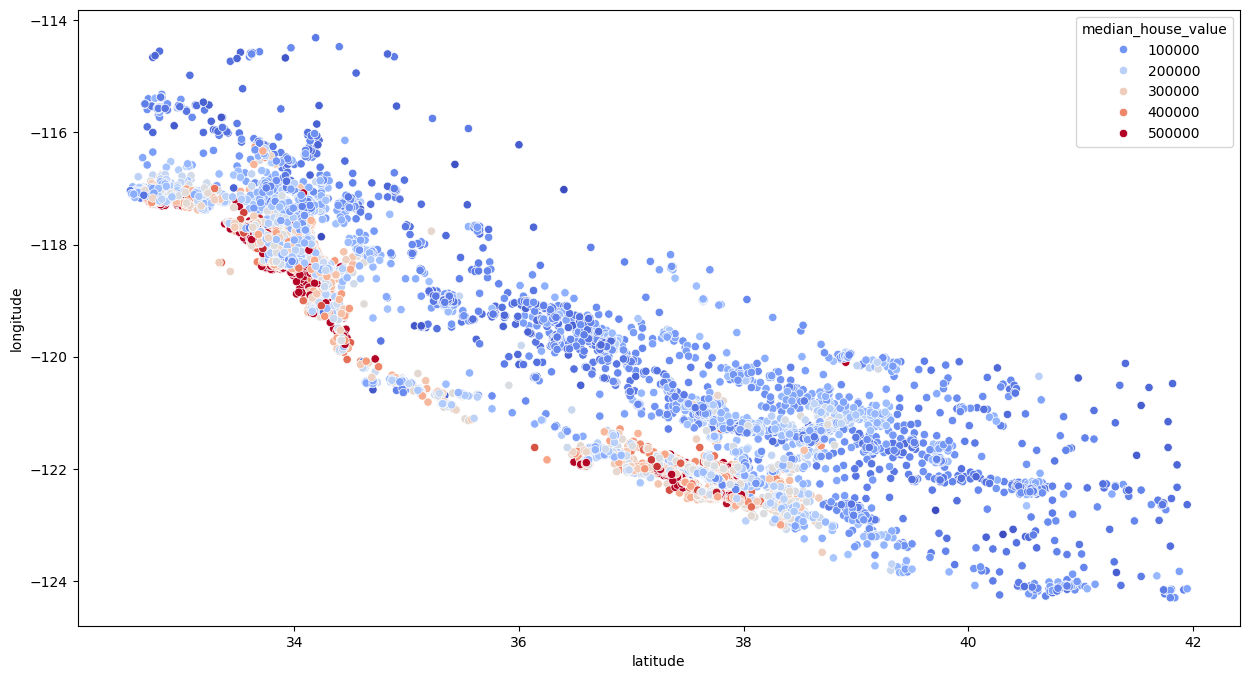

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [46]:
 #new features
 train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
 train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

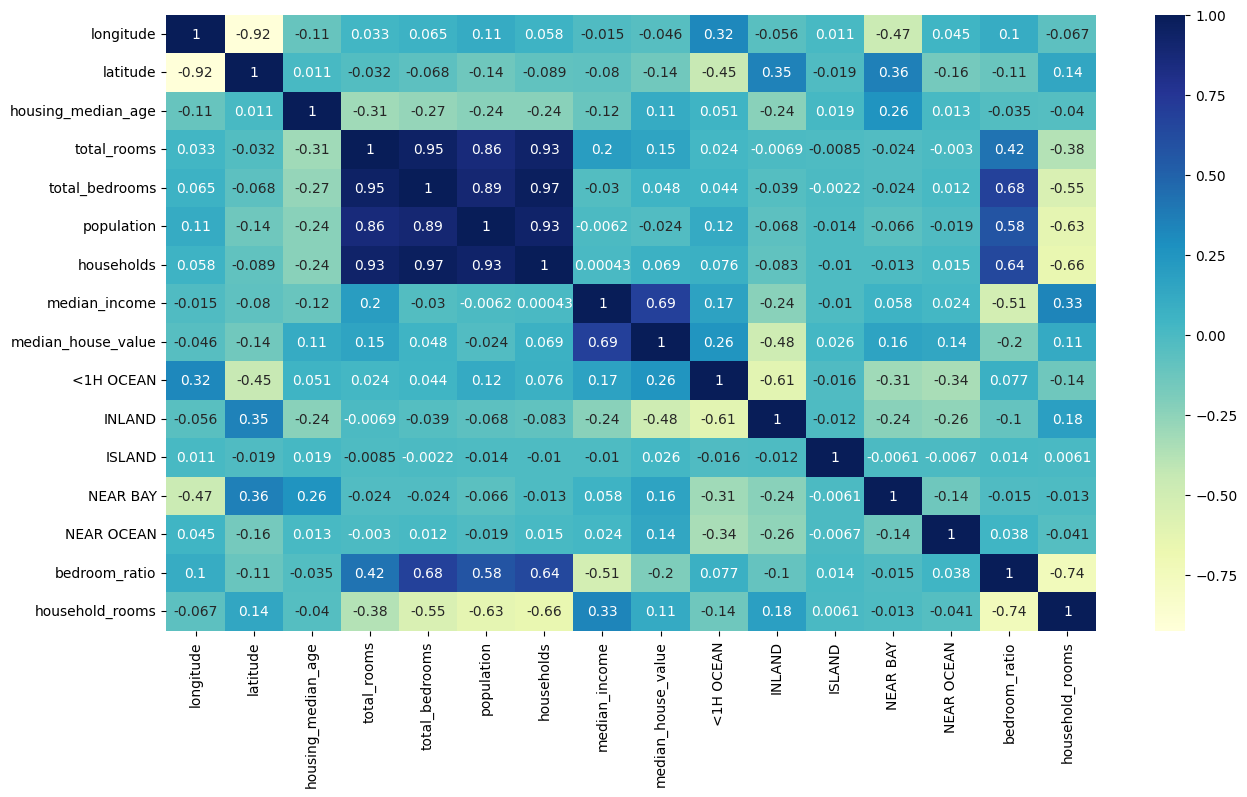

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [48]:
# same for the test data
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)
#new features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [49]:
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']

In [50]:
from sklearn.linear_model import LinearRegression

X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
test_data['ISLAND'] = 0
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,ISLAND
7309,-118.19,33.98,34.0,6.930495,5.659482,6.965080,5.620401,2.6042,156700.0,1,0,0,0,0.816606,1.233096,0
16490,-120.97,38.00,27.0,7.428927,5.666427,6.773080,5.556828,4.7069,176900.0,0,1,0,0,0.762752,1.336901,0
19626,-121.03,37.33,27.0,7.195937,5.442418,6.594413,5.438079,3.0600,106000.0,0,1,0,0,0.756318,1.323250,0
60,-122.29,37.83,52.0,7.022868,5.356586,6.318968,5.236442,3.3929,75700.0,0,0,1,0,0.762735,1.341153,0
15751,-122.45,37.77,52.0,7.451822,6.144186,6.786717,6.082219,3.0906,500001.0,0,0,1,0,0.824521,1.225182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,-117.24,33.94,15.0,7.358831,6.049733,7.024649,5.913503,1.6111,113900.0,0,1,0,0,0.822105,1.244411,0
6315,-117.99,34.00,26.0,8.002694,5.986452,7.224025,6.030685,6.6988,382500.0,1,0,0,0,0.748055,1.326996,0
11639,-118.05,33.83,24.0,8.370316,6.520621,7.734996,6.501290,5.7018,286700.0,1,0,0,0,0.779017,1.287485,0
4622,-118.32,34.07,52.0,8.000014,5.905362,6.875232,5.886104,11.2185,500001.0,1,0,0,0,0.738169,1.359136,0


In [52]:
test_data = test_data.reindex(columns=train_data.columns)

In [53]:
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']

In [54]:
y_pred = reg_model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mae

47036.14272771859

In [56]:
r2 = r2_score(y_test, y_pred)
r2

0.6752579714934381

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
forest.score(X_test, y_test)

0.8208828794847265

In [65]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    'min_samples_split': [2,4,6,8]

}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
best_estimator = grid_search.best_estimator_
best_estimator.score(X_test, y_test)

0.824780919714567